In [43]:
!nvidia-smi
!nvidia-smi -L


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [44]:
import csv
import torch
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import librosa


In [45]:
import fnmatch
import os

for file in os.listdir('.'):
    if fnmatch.fnmatch(file, 'out*.wav'):
      print(file)
      os.remove(file)

out0.wav
out3.wav
out1.wav
out4.wav
out2.wav


In [46]:
from scipy.io.wavfile import read as read_wav
import os
os.chdir('/content') # change to the file directory
sampling_rate, data=read_wav("/content/test.wav") # enter your filename
print (sampling_rate)

24000


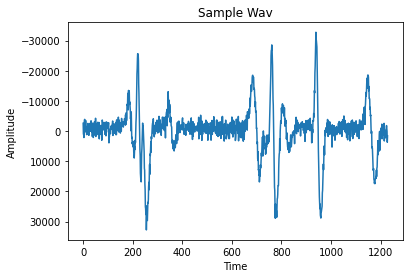

In [47]:
# read audio samples
input_data = read("/content/test.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.gca().invert_yaxis()
plt.show()

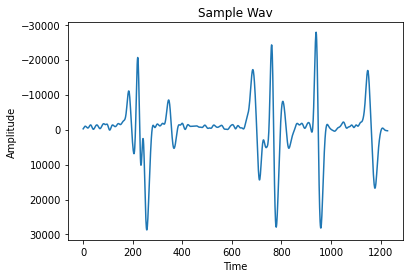

In [48]:
#how to read and plot audio: https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("/content/test3.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.gca().invert_yaxis()
plt.show()

In [49]:
# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
!pip install pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence
import fnmatch
import os
import decimal
from decimal import Decimal


for file in os.listdir('.'):
    if fnmatch.fnmatch(file, 'out*.wav'):
      print('deleting: ', file)
      os.remove(file)

for file in os.listdir('.'):
    if fnmatch.fnmatch(file, 'padded-file*.wav'):
      print('deleting: ', file)
      os.remove(file)

#https://stackoverflow.com/questions/45526996/split-audio-files-using-silence-detection

SpikeFile = AudioSegment.from_wav("/content/test3.wav")
# Split track where the silence is 2 seconds or more and get chunks using 
# the imported function.
chunks = split_on_silence (
    # Use the loaded audio.
    SpikeFile, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 1,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -20
)

# Process each chunk with your parameters
for i, chunk in enumerate(chunks):

    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=0)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Export the audio chunk with new bitrate.
    print("Exporting out{0}.wav".format(i))
    audio_chunk.export(".//out{0}.wav".format(i), format = "wav")



    # How to pad audio up to fixed length: https://stackoverflow.com/questions/52841335/how-can-i-pad-wav-file-to-specific-length/52841521#52841521

    pad_ms = 20 # Add here the fix length you want (in milliseconds)
    audio = AudioSegment.from_wav("out{0}.wav".format(i))
    assert pad_ms > len(audio), "Audio was longer that 1 second. Path: " + str('/content')
    silence = AudioSegment.silent(duration=pad_ms-len(audio)+1)


    padded = audio + silence  # Adding silence after the audio
    padded.export('padded-file{0}.wav'.format(i), format='wav')

# for file in os.listdir('.'):
#     if fnmatch.fnmatch(file, 'out*.wav'):
#         print(file)
#         input_data = read(file)
#         audio = input_data[1]
#         plt.plot(audio[0:])
#         plt.ylabel("Amplitude")
#         plt.xlabel("Time")
#         plt.title("Sample Wav")
#         plt.gca().invert_yaxis()
#         plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
deleting:  padded-file2.wav
deleting:  padded-file3.wav
deleting:  padded-file1.wav
deleting:  padded-file4.wav
deleting:  padded-file0.wav
Exporting out0.wav
Exporting out1.wav
Exporting out2.wav
Exporting out3.wav
Exporting out4.wav


padded-file2.wav
0.020916666666666667
24000


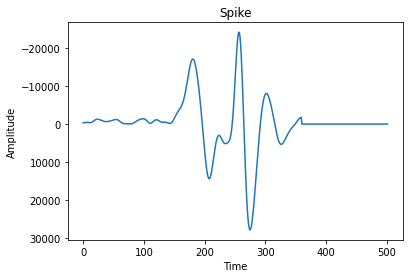

padded-file3.wav
0.020916666666666667
24000


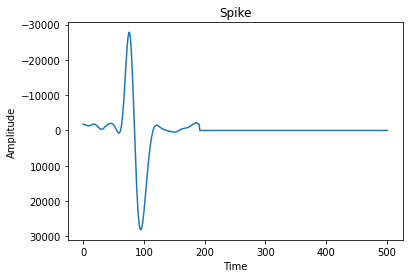

padded-file1.wav
0.020916666666666667
24000


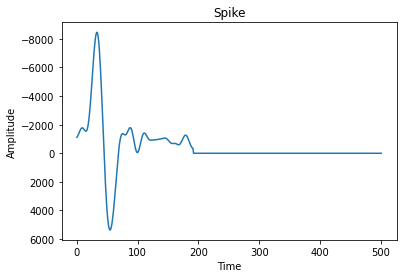

padded-file4.wav
0.020916666666666667
24000


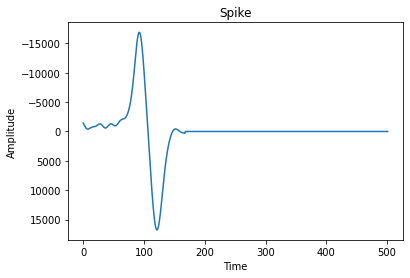

padded-file0.wav
0.020916666666666667
24000


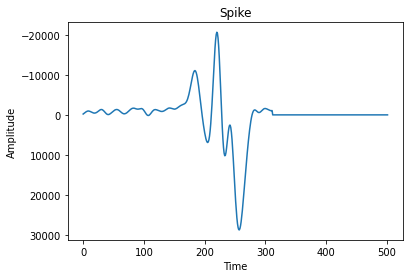

In [50]:
for file in os.listdir('.'):
    if fnmatch.fnmatch(file, 'padded-file*.wav'):
        print(file)
        input_data = read(file)
        audio = input_data[1]
        Audio_Duration = AudioSegment.from_file(file)
        print(Audio_Duration.duration_seconds)
        sampling_rate, data=read_wav(file) # enter your filename
        print (sampling_rate)
        plt.plot(audio[0:])
        plt.ylabel("Amplitude")
        plt.xlabel("Time")
        plt.title("Spike")
        plt.gca().invert_yaxis()
        plt.show()

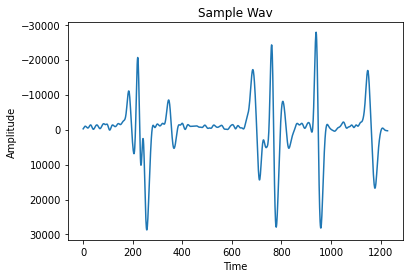

In [51]:
#how to read and plot audio: https://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("/content/test3.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.gca().invert_yaxis()
plt.show()

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [53]:
#model structure from: https://www.youtube.com/playlist?list=PL-wATfeyAMNoirN4idjev6aRu8ISZYVWm

# 
# import torchvision.transforms as transforms
# import torch.optim as optim
# import torch.nn.functional as F

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
import torchaudio




import pandas as pd
from torch.utils.data import random_split
import os



Batch_Size = 5
Total_Epochs = 10
Learning_Rate = 0.001
SampleRate = 24000


class AudioNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels = 1,
            out_channels= 16,
            kernel_size = 3,
            stride = 1,
            padding = 2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(
            in_channels = 16,
            out_channels= 32,
            kernel_size = 3,
            stride = 1,
            padding = 2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(
            in_channels = 32,
            out_channels= 64,
            kernel_size = 3,
            stride = 1,
            padding = 2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv4 = nn.Sequential(
        nn.Conv2d(
            in_channels = 64,
            out_channels= 128,
            kernel_size = 3,
            stride = 1,
            padding = 2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(128 * 5 * 1, 2)
    self.softmax = nn.Softmax(dim = 1)

  def forward(self, input_data):
    x = self.conv1(input_data)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.flatten(x)
    logits = self.linear(x)
    predictions = self.softmax(logits)
    return predictions

class Spikes (Dataset):
    def __init__(self, csv_file, audio_dir, transform, Sample_Rate):
      self.csv_file = pd.read_csv(csv_file)
      self.audio_dir = audio_dir
      self.transform = transform
      self.Sample_Rate = Sample_Rate
      

    def __len__(self):
      return len(self.csv_file)

    def __getitem__(self, index):
      audio_sample_path = self._get_audio_sample_path(index)
      label = self._get_audio_sample_label(index)
      signal, sr = torchaudio.load(audio_sample_path)
      print(signal.shape)
      signal = self.transform(signal)
      return signal, label

    def _get_audio_sample_path(self, index): 
      path = os.path.join(self.audio_dir, self.csv_file.iloc[index, 0])
      return path

    def _get_audio_sample_label(self, index):
      return self.csv_file.iloc[index, 1]

def train_epoch(model, data_loader, loss_fn, optimizer, device):
  for inputs, target in data_loader:

      inputs = inputs.to(device)
      target = target.to(device)

      predictions = model(inputs)
      loss = loss_fn(predictions, target)


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

  print (f"Loss: {loss.item()}")

def create_data_loader(train_data, Batch_Size):
  train_dataloader = DataLoader(train_data, batch_size=Batch_Size)
  return train_dataloader

def train(model, data_loader, loss_fn, optimizer, device, epochs):
  for i in range(epochs):
    print(f"Epoch {i+1}")
    train_epoch(model, data_loader, loss_fn, optimizer, device)
  print("Training done")


def number_of_correct(pred, target):
    # count number of correct predictions
    return pred.squeeze().eq(target).sum().item()


def get_likely_index(tensor):
    # find most likely label index for each element in the batch
    return tensor.argmax(dim=-1)


if __name__ == "__main__":
  CSV_FILE = '/content/drive/MyDrive/Spike_Data/Spikes_Labels_CSV.csv'
  AUDIO_DIR = '/content/drive/MyDrive/Spike_Data/True-and-False-Spikes'

  

  #Mel_Spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate = SampleRate, n_fft=1024, hop_length=512, n_mels=64)
  Mel_Spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate = SampleRate, n_fft=502, hop_length=512, n_mels=64)

  spik = Spikes(CSV_FILE, AUDIO_DIR, Mel_Spectrogram, SampleRate)

  train_dataloader = create_data_loader(spik, Batch_Size)


  # train_set, validation_set = torch.utils.data.random_split(spik, [20, 10])
  # print(train_set)
  # print(validation_set)
  TRAIN_DATA = '/content/drive/MyDrive/Spike_Data/Train_Data_CSV.csv'
  VALIDATION_DATA = '/content/drive/MyDrive/Spike_Data/Validation_Data_CSV.csv'

  spik_TRAIN = Spikes(TRAIN_DATA, AUDIO_DIR, Mel_Spectrogram, SampleRate)


  train_data_loader = DataLoader(dataset = spik_TRAIN, batch_size = Batch_Size)
  validationdata_loader = DataLoader(dataset = VALIDATION_DATA, batch_size = Batch_Size)


  AudioNeuralNet = AudioNN().to(device)
  print(AudioNeuralNet)

  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(AudioNeuralNet.parameters(), lr=Learning_Rate)
  
  train(AudioNeuralNet, train_data_loader, loss_fn, optimizer, device, Total_Epochs)




  print(TRAIN_DATA)
  print(VALIDATION_DATA)



  print(f"There are {len(spik)} samples in the dataset.")

  signal, label = spik[0]

  print(signal.shape)

  # test(AudioNeuralNet, Total_Epochs)


  
  # NeuralNet = NeuralNetwork().to(device)

  
  torch.save(AudioNeuralNet.state_dict(), "/content/drive/MyDrive/Spike_Data/NeuralNetwork.pth")



AudioNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=640, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1
torch.Size([1, 502])
torch.Size([1, 